## Import From Google Drive

In [3]:
import numpy as np
import nltk
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
import matplotlib.dates as mdates
%matplotlib inline  

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
movie_metadata = pd.read_csv('/content/gdrive/My Drive/S19 - Empirical Methods/project/cornell-movie-dialogs-corpus-new-seperator/movie_titles_metadata.txt', sep='|', header=None, names=["movie_id","movie_title","release_year","avg_rating","num_votes","genres"], encoding = "ISO-8859-1")
#movie_metadata = pd.read_csv('cornell-movie-dialogs-corpus-new-seperator/movie_titles_metadata.txt', sep='|', header=None, names=["movie_id","movie_title","release_year","avg_rating","num_votes","genres"], encoding = "ISO-8859-1")

In [5]:
movie_metadata.describe()

,release_year,avg_rating,num_votes
count,617.000000,617.000000,617.000000
mean,1988.575365,6.863857,49820.962723
std,16.589229,1.215233,61880.609145
min,1927.000000,2.500000,9.000000
25%,1984.000000,6.200000,9919.000000
50%,1994.000000,7.000000,27112.000000
75%,1999.000000,7.800000,66781.000000
max,2010.000000,9.300000,419312.000000


In [0]:
character_metadata = pd.read_csv('/content/gdrive/My Drive/S19 - Empirical Methods/project/cornell-movie-dialogs-corpus-new-seperator/movie_characters_metadata.txt', sep='|', header=None, names=["character_id","character_name","movie_id","movie_title","gender","position"], encoding = "ISO-8859-1")
#character_metadata = pd.read_csv('cornell-movie-dialogs-corpus-new-seperator/movie_characters_metadata.txt', sep='|', header=None, names=["character_id","character_name","movie_id","movie_title","gender","position"], encoding = "ISO-8859-1")

In [9]:
character_metadata.head()

,character_id,character_name,movie_id,movie_title,gender,position
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [0]:
movie_conversations_data = pd.read_csv('/content/gdrive/My Drive/S19 - Empirical Methods/project/cornell-movie-dialogs-corpus-new-seperator/movie_conversations.txt', sep='|', header=None, names=["char1_id","char2_id","movie_id","lines"], encoding = "ISO-8859-1")
#movie_conversations_data = pd.read_csv('cornell-movie-dialogs-corpus-new-seperator/movie_conversations.txt', sep='|', header=None, names=["char1_id","char2_id","movie_id","lines"], encoding = "ISO-8859-1")


In [11]:
movie_conversations_data.head()

,char1_id,char2_id,movie_id,lines
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']"
1,u0,u2,m0,"['L198', 'L199']"
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']"
3,u0,u2,m0,"['L204', 'L205', 'L206']"
4,u0,u2,m0,"['L207', 'L208']"


In [0]:
movie_lines = pd.read_excel('/content/gdrive/My Drive/S19 - Empirical Methods/project/cornell-movie-dialogs-corpus-new-seperator/liwc_results_movie_line.xlsx')
#movie_lines = pd.read_excel('cornell-movie-dialogs-corpus-new-seperator/liwc_results_movie_line.xlsx')

In [13]:
movie_lines['line_id'] = movie_lines['line_id'].str.strip()
movie_lines['user_id'] = movie_lines['user_id'].str.strip()
movie_lines['movie_id'] = movie_lines['movie_id'].str.strip()
movie_lines.describe()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,...,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000,304713.000000
mean,10.518222,35.069726,61.428663,43.181809,37.343549,5.816952,10.801329,88.590536,54.605788,23.702809,...,5.062662,0.123573,0.028613,7.903339,2.517672,2.835041,0.190842,7.322128,0.002395,0.664301
std,12.000653,38.313719,36.596854,42.170946,32.144783,4.237084,15.951661,18.489230,23.844673,17.879556,...,9.485947,2.227319,0.572159,18.581535,13.201791,18.716854,2.410326,11.248464,0.275544,6.673286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,50.000000,1.000000,25.770000,3.000000,0.000000,83.330000,46.150000,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,17.960000,50.000000,23.510000,25.770000,5.000000,5.560000,96.880000,57.140000,23.080000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,76.190000,99.000000,96.400000,25.770000,7.500000,16.670000,100.000000,66.670000,33.330000,...,7.690000,0.000000,0.000000,7.690000,0.000000,0.000000,0.000000,12.500000,0.000000,0.000000
max,571.000000,99.000000,99.000000,99.000000,99.000000,106.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,57.140000,500.000000,1600.000000,3750.000000,133.330000,200.000000,100.000000,400.000000


## Explore dataset

In [14]:
character_metadata.query('gender == "f"|gender == "F"').describe()

,character_id,character_name,movie_id,movie_title,gender,position
count,966,966,966,966,966,966
unique,966,611,527,527,2,44
top,u8834,MARY,m244,the anniversary party,f,2
freq,1,11,7,7,921,211


In [15]:
character_metadata.query('gender == "m"|gender == "M"').describe()

,character_id,character_name,movie_id,movie_title,gender,position
count,2049,2049,2049,2049,2049,2049
unique,2049,1380,592,592,2,49
top,u2333,JACK,m428,magnolia,m,1
freq,1,17,12,12,1899,408


In [0]:
# Get only female and male characters
f_m_chars = character_metadata.loc[(character_metadata['gender'] != '?')]

In [0]:
# Get only female and male dialogues
f_m_dialogues = movie_conversations_data.loc[(movie_conversations_data['char1_id'].isin(f_m_chars['character_id'])) & (movie_conversations_data['char2_id'].isin(f_m_chars['character_id'])) ]

In [18]:
f_m_dialogues.describe()

,char1_id,char2_id,movie_id,lines
count,52038,52038,52038,52038
unique,1919,1908,591,52038
top,u1469,u603,m435,"['L505973', 'L505974', 'L505975', 'L505976', '..."
freq,180,169,264,1


In [0]:
# female-female Dialogues
f_f = f_m_dialogues.loc[(f_m_dialogues['char1_id'].isin(f_m_chars.query('gender == "f"|gender == "F"')['character_id']))
                         & (f_m_dialogues['char2_id'].isin(f_m_chars.query('gender == "f"|gender == "F"')['character_id']))]

In [20]:
f_f.describe()

,char1_id,char2_id,movie_id,lines
count,3134,3134,3134,3134
unique,186,193,139,3134
top,u3261,u7885,m533,"['L423996', 'L423997', 'L423998', 'L423999', '..."
freq,100,108,149,1


In [0]:
# Male-Male Dialogues
m_m = f_m_dialogues.loc[(f_m_dialogues['char1_id'].isin(f_m_chars.query('gender == "m"|gender == "M"')['character_id']))
                         & (f_m_dialogues['char2_id'].isin(f_m_chars.query('gender == "m"|gender == "M"')['character_id']))]

In [22]:
m_m.describe()

,char1_id,char2_id,movie_id,lines
count,23321,23321,23321,23321
unique,1072,1073,499,23321
top,u1469,u603,m38,"['L160256', 'L160257', 'L160258', 'L160259', '..."
freq,166,169,228,1


In [0]:
# Female-Male Dialogues
f_m = f_m_dialogues.loc[(~((f_m_dialogues['char1_id'].isin(f_m_chars.query('gender == "m"|gender == "M"')['character_id']))
                         & (f_m_dialogues['char2_id'].isin(f_m_chars.query('gender == "m"|gender == "M"')['character_id'])))) &
                        (~((f_m_dialogues['char1_id'].isin(f_m_chars.query('gender == "f"|gender == "F"')['character_id']))
                         & (f_m_dialogues['char2_id'].isin(f_m_chars.query('gender == "f"|gender == "F"')['character_id']))))]

In [24]:
f_m.describe()

,char1_id,char2_id,movie_id,lines
count,25583,25583,25583,25583
unique,1127,1118,516,25583
top,u5064,u5065,m513,"['L266995', 'L266996']"
freq,152,152,176,1


In [25]:
#extract lines from female female dialogues
f_f_lines = np.concatenate(f_f['lines'].apply(literal_eval).values.tolist()).ravel().tolist()
f_f_movie_lines = movie_lines.loc[(movie_lines['line_id'].isin(f_f_lines))]
f_f_movie_lines.describe()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.00000,12015.000000,12015.000000,...,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000,12015.000000
mean,10.244777,30.500740,60.525974,43.173977,38.752749,5.762879,9.986858,90.64697,56.300970,24.888806,...,4.899692,0.089799,0.015551,7.883777,2.672215,1.649602,0.162382,7.736930,0.003121,0.545426
std,10.976840,36.869335,37.439085,42.402068,33.258170,4.048045,15.200863,16.82702,23.879838,17.996590,...,9.504723,1.910218,0.447964,19.046851,12.861212,9.745607,1.884680,11.122287,0.254987,5.624951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,29.920000,1.000000,25.770000,3.000000,0.000000,86.67000,50.000000,14.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,8.190000,50.000000,23.510000,25.770000,5.000000,4.170000,100.00000,60.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,60.800000,99.000000,98.010000,25.770000,7.330000,15.380000,100.00000,69.230000,33.330000,...,7.140000,0.000000,0.000000,7.690000,0.000000,0.000000,0.000000,12.500000,0.000000,0.000000
max,177.000000,99.000000,99.000000,99.000000,99.000000,46.000000,100.000000,100.00000,100.000000,100.000000,...,83.330000,50.000000,33.330000,400.000000,300.000000,400.000000,66.670000,100.000000,25.000000,125.000000


In [26]:
#extract lines from male male dialogues
m_m_lines = np.concatenate(m_m['lines'].apply(literal_eval).values.tolist()).ravel().tolist()
m_m_movie_lines = movie_lines.loc[(movie_lines['line_id'].isin(m_m_lines))]
m_m_movie_lines.describe()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,...,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000,87841.000000
mean,11.065641,36.177231,61.846043,42.900946,35.944758,5.964886,10.671154,88.155855,54.512866,23.574583,...,5.223856,0.117205,0.031264,7.686827,2.480406,2.886189,0.209465,7.335433,0.001585,0.590779
std,12.980364,38.391939,36.449007,41.888608,31.464460,4.323803,15.570852,18.331890,23.273101,17.788604,...,9.478496,2.097451,0.541200,18.378318,12.529175,16.382031,2.458999,11.241788,0.179721,6.293191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,50.000000,1.000000,25.770000,3.000000,0.000000,83.330000,45.830000,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,17.960000,50.000000,23.510000,25.770000,5.000000,5.710000,94.640000,57.140000,22.860000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.000000,78.350000,99.000000,94.810000,25.770000,7.800000,16.670000,100.000000,66.670000,33.330000,...,7.690000,0.000000,0.000000,7.690000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
max,571.000000,99.000000,99.000000,99.000000,99.000000,106.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,50.000000,33.330000,500.000000,500.000000,1875.000000,100.000000,200.000000,33.330000,400.000000


In [27]:
#extract lines from female male dialogues
f_m_lines = np.concatenate(f_m['lines'].apply(literal_eval).values.tolist()).ravel().tolist()
f_m_movie_lines = movie_lines.loc[(movie_lines['line_id'].isin(f_m_lines))]
f_m_movie_lines.describe()

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
count,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000,...,100931.000000,100931.000000,100931.000000,100931.000000,100931.00000,100931.000000,100931.000000,100931.000000,100931.000000,100931.000000
mean,10.212056,31.916431,59.707935,45.541131,38.667448,5.661615,10.284361,90.175495,56.424169,24.818220,...,4.635572,0.121380,0.019602,8.320317,2.24763,3.054693,0.186135,7.554145,0.001934,0.682079
std,11.750777,37.536085,37.224144,42.697612,32.749896,4.136008,15.716323,17.586986,23.994849,18.172113,...,9.151952,2.250112,0.456337,19.233494,13.36582,20.799960,2.444615,11.454515,0.330726,6.887315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,29.920000,1.000000,25.770000,3.000000,0.000000,85.710000,50.000000,13.640000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,8.190000,50.000000,37.240000,25.770000,5.000000,4.170000,100.000000,60.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,67.140000,99.000000,98.010000,25.770000,7.000000,16.670000,100.000000,70.000000,33.330000,...,6.670000,0.000000,0.000000,8.570000,0.00000,0.000000,0.000000,12.500000,0.000000,0.000000
max,479.000000,99.000000,99.000000,99.000000,99.000000,87.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,50.000000,33.330000,400.000000,1600.00000,3750.000000,100.000000,200.000000,100.000000,200.000000


## Male references in text
The first aspect is when two female characters are talking to each other, they will be talking about something other than men.  
Here we will measure the men words in their dialogue and see how it change with time. 

In [0]:

f_m_male_words = f_m_movie_lines[['male','movie_id']].groupby('movie_id',as_index=False).mean()
m_m_male_words= m_m_movie_lines[['male','movie_id']].groupby('movie_id',as_index=False).mean()
f_f_male_words = f_f_movie_lines[['male','movie_id']].groupby('movie_id',as_index=False).mean()

In [29]:
f_m_male_words.describe()

,male
count,516.000000
mean,1.933456
std,1.165527
min,0.000000
25%,1.102542
50%,1.719781
75%,2.492468
max,7.304783


In [30]:
m_m_male_words.describe()

,male
count,499.000000
mean,2.258682
std,1.530449
min,0.000000
25%,1.277264
50%,1.996286
75%,2.867668
max,12.219310


In [31]:
f_f_male_words.describe()

,male
count,139.000000
mean,2.622053
std,2.011755
min,0.000000
25%,1.079632
50%,2.375352
75%,3.712160
max,10.653000


In [32]:
f_m_movies = movie_metadata[['movie_id','release_year','genres']].loc[movie_metadata['movie_id'].isin(f_m_male_words['movie_id'])].set_index('movie_id')
m_m_movies = movie_metadata[['movie_id','release_year','genres']].loc[movie_metadata['movie_id'].isin(m_m_male_words['movie_id'])].set_index('movie_id')
f_f_movies = movie_metadata[['movie_id','release_year','genres']].loc[movie_metadata['movie_id'].isin(f_f_male_words['movie_id'])].set_index('movie_id')
f_m_male_words = f_m_male_words.set_index('movie_id')
m_m_male_words= m_m_male_words.set_index('movie_id')
f_f_male_words = f_f_male_words.set_index('movie_id')
f_m_movies.describe()
m_m_movies.describe()
f_f_movies.describe()

,release_year
count,139.000000
mean,1986.438849
std,21.097811
min,1931.000000
25%,1986.000000
50%,1995.000000
75%,1999.000000
max,2007.000000


In [0]:
f_m_merged_male_genre_year = pd.concat([f_m_male_words, f_m_movies], axis=1, join="inner")
m_m_merged_male_genre_year = pd.concat([m_m_male_words, m_m_movies], axis=1, join="inner")
f_f_merged_male_genre_year = pd.concat([f_f_male_words, f_f_movies], axis=1, join="inner")

In [34]:
f_f_merged_male_genre_year

,male,release_year,genres
movie_id,,,
m0,3.009412,1999,"['comedy', 'romance']"
m102,3.516607,2003,"['comedy', 'romance', 'crime']"
m103,5.410100,1934,"['comedy', 'romance']"
m105,3.138750,1997,"['crime', 'drama', 'thriller']"
m109,1.435358,2007,"['comedy', 'drama']"
m110,1.893333,1993,"['crime', 'drama', 'thriller']"
m111,2.850256,1995,"['crime', 'drama']"
m117,2.559623,2001,['comedy']
m119,10.556667,2001,"['drama', 'romance']"


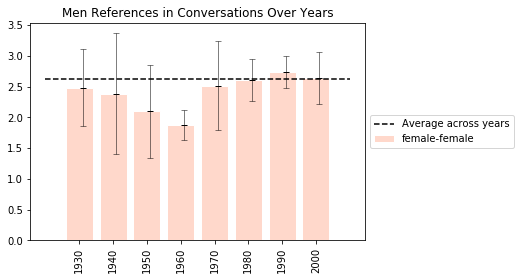

In [35]:
# Modify Plots (add all datasets in one plot with 3 different colors)
f_f_plot_std = f_f_merged_male_genre_year['male'].groupby((f_f_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).std()
f_f_plot_mean = f_f_merged_male_genre_year['male'].groupby((f_f_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).mean()
f_f_plot_count = f_f_merged_male_genre_year['male'].groupby((f_f_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).count()

f_m_plot_std = f_m_merged_male_genre_year['male'].groupby((f_m_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).std()
f_m_plot_mean = f_m_merged_male_genre_year['male'].groupby((f_m_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).mean()
f_m_plot_count = f_m_merged_male_genre_year['male'].groupby((f_m_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).count()

f_m_plot_std.drop(f_m_plot_std.tail(1).index,inplace=True)
f_m_plot_mean.drop(f_m_plot_mean.tail(1).index,inplace=True)
f_m_plot_count.drop(f_m_plot_count.tail(1).index,inplace=True)

m_m_plot_std = m_m_merged_male_genre_year['male'].groupby((m_m_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).std()
m_m_plot_mean = m_m_merged_male_genre_year['male'].groupby((m_m_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).mean()
m_m_plot_count = m_m_merged_male_genre_year['male'].groupby((m_m_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).count()
f_f_average= f_f_merged_male_genre_year.mean()['male']
f_f_median= f_f_merged_male_genre_year.median()['male']
#f_m_plot = f_m_merged_male_genre_year.groupby((f_m_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).mean()
#m_m_plot = m_m_merged_male_genre_year.groupby((m_m_merged_male_genre_year['release_year'].apply(int)//10)*10,as_index=True).mean()
#ax.bar(range(len(f_f_plot_std)), f_f_plot_mean, color="orange" )
#err = np.divide(f_f_plot_std, np.sqrt(f_f_plot_count))
#ax.errorbar(range(len(f_f_plot_std)), f_f_plot_mean, yerr=err, zorder=2)
#ax.xticks(range(len(f_f_plot_std)), f_f_plot_std.keys(), rotation=90)
#plt.show()
#ax = plt.subplot(111)
#ax = plt.subplot(111)

#plt.bar(np.subtract(range(len(m_m_plot_std)),1.5*0.2), m_m_plot_mean,color='#a3acff', edgecolor='white',align='center', width=0.2, label='male-male')
plt.bar(range(len(f_f_plot_std)), f_f_plot_mean,color='#FFD8CB', edgecolor='white',align='center', label='female-female')
#plt.bar(np.subtract(range(len(f_m_plot_std)),0.5*0.2), f_m_plot_mean,color='#f9bc86', edgecolor='white',align='center', width=0.2,  label='cross-gender')
plt.hlines(f_f_average, -1, len(f_f_plot_std),colors='k', linestyles='--', label='Average across years')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#err = np.divide(m_m_plot_std, np.sqrt(m_m_plot_count))
#plt.errorbar(np.subtract(range(len(m_m_plot_std)),1.5*0.2), m_m_plot_mean, yerr=err, zorder=2, fmt="k_",
#    linewidth=3,   # width of plot line
#    elinewidth=0.5,# width of error bar line
#    ecolor='k',    # color of error bar
#   capsize=3,     # cap length for error bar
#    capthick=0.5   # cap thickness for error bar 
#    )

#err = np.divide(f_m_plot_std, np.sqrt(f_m_plot_count))
#plt.errorbar(np.subtract(range(len(f_m_plot_std)),0.5*0.2), f_m_plot_mean, yerr=err, zorder=2, fmt="k_",
#    linewidth=3,   # width of plot line
#    elinewidth=0.5,# width of error bar line
#    ecolor='k',    # color of error bar
#    capsize=3,     # cap length for error bar
#    capthick=0.5   # cap thickness for error bar 
#    )

err = np.divide(f_f_plot_std, np.sqrt(f_f_plot_count))
plt.errorbar(np.add(range(len(f_f_plot_std)),0.5*0.2), f_f_plot_mean, yerr=err, zorder=2, fmt="k_",
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    ecolor='k',    # color of error bar
    capsize=3,     # cap length for error bar
    capthick=0.5   # cap thickness for error bar 
    )

plt.title("Men References in Conversations Over Years")
plt.xticks(range(len(m_m_plot_std)), m_m_plot_std.keys(), rotation=90)
plt.show()

In [36]:
import string
genres = set()
table = str.maketrans({key: None for key in string.punctuation})
for i in f_f_merged_male_genre_year.genres:
    i = i.translate(table)
    genres.update(i.split())
genres.remove('scifi')
genres.remove('musical')
print(genres)

{'crime', 'western', 'drama', 'music', 'biography', 'war', 'fantasy', 'family', 'thriller', 'mystery', 'adult', 'romance', 'short', 'adventure', 'documentary', 'horror', 'sport', 'comedy', 'action'}


In [0]:
import re
genre_f_f_lines_male_words_mean = {}
genre_f_f_lines_male_words_count = {}
genre_f_f_lines_male_words_std = {}
#test = movie_character_line[:100]
#.groupby(f_f_merged_male_genre_year.gender.str.lower()).sum()
# In groupby, sort=True by default, so 0 is female, 1 is male.
for i in genres:
    mean = f_f_merged_male_genre_year[f_f_merged_male_genre_year.genres.str.contains(i, re.IGNORECASE)].mean()
    count = f_f_merged_male_genre_year[f_f_merged_male_genre_year.genres.str.contains(i, re.IGNORECASE)].count()
    std = f_f_merged_male_genre_year[f_f_merged_male_genre_year.genres.str.contains(i, re.IGNORECASE)].std()
    if mean[0] or mean[1]:
        genre_f_f_lines_male_words_mean[i] = mean[0]
        genre_f_f_lines_male_words_count[i] = count[0]
        genre_f_f_lines_male_words_std[i] = std[0]
            
genre_f_f_lines_male_words_count = pd.DataFrame.from_dict(genre_f_f_lines_male_words_count,orient='index')
genre_f_f_lines_male_words_count.columns=['male']
genre_f_f_lines_male_words_count.index.name = 'genre'
genre_f_f_lines_male_words_std = pd.DataFrame.from_dict(genre_f_f_lines_male_words_std,orient='index')
genre_f_f_lines_male_words_std.columns=['male']
genre_f_f_lines_male_words_std.index.name = 'genre'
genre_f_f_lines_male_words_mean = pd.DataFrame.from_dict(genre_f_f_lines_male_words_mean,orient='index')
genre_f_f_lines_male_words_mean.columns=['male']
genre_f_f_lines_male_words_mean.index.name = 'genre'

f_f_average= f_f_merged_male_genre_year.mean()['male']

In [38]:
genre_f_m_lines_male_words_mean = {}
genre_f_m_lines_male_words_count = {}
genre_f_m_lines_male_words_std = {}
#test = movie_character_line[:100]
#.groupby(f_f_merged_male_genre_year.gender.str.lower()).sum()
# In groupby, sort=True by default, so 0 is female, 1 is male.
for i in genres:
    mean = f_m_merged_male_genre_year[f_m_merged_male_genre_year.genres.str.contains(i, re.IGNORECASE)].mean()
    count = f_m_merged_male_genre_year[f_m_merged_male_genre_year.genres.str.contains(i, re.IGNORECASE)].count()
    std = f_m_merged_male_genre_year[f_m_merged_male_genre_year.genres.str.contains(i, re.IGNORECASE)].std()
    if mean[0] or mean[1]:
        genre_f_m_lines_male_words_mean[i] = mean[0]
        genre_f_m_lines_male_words_count[i] = count[0]
        genre_f_m_lines_male_words_std[i] = std[0]
        
genre_f_m_lines_male_words_count = pd.DataFrame.from_dict(genre_f_m_lines_male_words_count,orient='index')
genre_f_m_lines_male_words_count.columns=['male']
genre_f_m_lines_male_words_count.index.name = 'genre'
genre_f_m_lines_male_words_std = pd.DataFrame.from_dict(genre_f_m_lines_male_words_std,orient='index')
genre_f_m_lines_male_words_std.columns=['male']
genre_f_m_lines_male_words_std.index.name = 'genre'
genre_f_m_lines_male_words_mean = pd.DataFrame.from_dict(genre_f_m_lines_male_words_mean,orient='index')
genre_f_m_lines_male_words_mean.columns=['male']
genre_f_m_lines_male_words_mean.index.name = 'genre'

 
genre_f_m_lines_male_words_mean

,male
genre,
crime,2.046517
western,2.337645
drama,2.069464
music,1.752203
biography,2.228317
war,2.429696
fantasy,1.851962
family,1.752598
thriller,2.154965


In [39]:
genre_m_m_lines_male_words_mean = {}
genre_m_m_lines_male_words_count = {}
genre_m_m_lines_male_words_std = {}
#test = movie_character_line[:100]
#.groupby(f_f_merged_male_genre_year.gender.str.lower()).sum()
# In groupby, sort=True by default, so 0 is female, 1 is male.
for i in genres:
    mean = m_m_merged_male_genre_year[m_m_merged_male_genre_year.genres.str.contains(i, re.IGNORECASE)].mean()
    count = m_m_merged_male_genre_year[m_m_merged_male_genre_year.genres.str.contains(i, re.IGNORECASE)].count()
    std = m_m_merged_male_genre_year[m_m_merged_male_genre_year.genres.str.contains(i, re.IGNORECASE)].std()
    if mean[0]:
        genre_m_m_lines_male_words_mean[i] = mean[0]
        genre_m_m_lines_male_words_count[i] = count[0]
        genre_m_m_lines_male_words_std[i] = std[0]

genre_m_m_lines_male_words_count = pd.DataFrame.from_dict(genre_m_m_lines_male_words_count,orient='index')
genre_m_m_lines_male_words_count.columns=['male']
genre_m_m_lines_male_words_count.index.name = 'genre'
genre_m_m_lines_male_words_std = pd.DataFrame.from_dict(genre_m_m_lines_male_words_std,orient='index')
genre_m_m_lines_male_words_std.columns=['male']
genre_m_m_lines_male_words_std.index.name = 'genre'
genre_m_m_lines_male_words_mean = pd.DataFrame.from_dict(genre_m_m_lines_male_words_mean,orient='index')
genre_m_m_lines_male_words_mean.columns=['male']
genre_m_m_lines_male_words_mean.index.name = 'genre'
genre_m_m_lines_male_words_mean

,male
genre,
crime,2.422137
western,2.940781
drama,2.314558
music,2.345116
biography,2.207393
war,2.290079
fantasy,2.361039
family,2.594390
thriller,2.275441


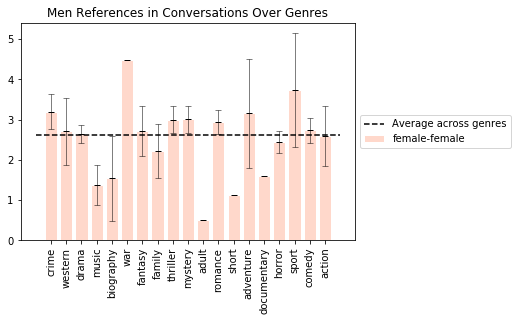

Index(['male'], dtype='object')

In [40]:
plt.title("Men References in Conversations Over Genres")
plt.xticks(range(len(genre_f_f_lines_male_words_std)), genre_f_f_lines_male_words_std.index, rotation=90)
#plt.bar(np.subtract(range(len(genre_m_m_lines_male_words_mean)),1.5*0.2), genre_m_m_lines_male_words_mean['male'],color='#a3acff', edgecolor='white',align='center', width=0.2, label='male-male')
plt.bar(range(len(genre_f_f_lines_male_words_mean)), genre_f_f_lines_male_words_mean['male'],color='#FFD8CB', edgecolor='white',align='center', label='female-female')
#plt.bar(np.subtract(range(len(genre_f_m_lines_male_words_mean)),0.5*0.2), genre_f_m_lines_male_words_mean['male'],color='#f9bc86', edgecolor='white',align='center', width=0.2,  label='cross-gender')
plt.hlines(f_f_average, -1, len(genre_f_f_lines_male_words_mean),colors='k', linestyles='--', label='Average across genres')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

err = np.divide(genre_f_f_lines_male_words_std['male'], np.sqrt(genre_f_f_lines_male_words_count['male']))
plt.errorbar(range(len(genre_f_f_lines_male_words_mean)), genre_f_f_lines_male_words_mean['male'], yerr=err, zorder=2, fmt="k_",
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    ecolor='k',    # color of error bar
    capsize=3,     # cap length for error bar
    capthick=0.5   # cap thickness for error bar 
    )
#f_f_average
plt.show()
genre_f_f_lines_male_words_std.keys()


In [41]:
f_m_plot_count.values
genre_m_m_lines_male_words_mean['male']

genre
crime          2.422137
western        2.940781
drama          2.314558
music          2.345116
biography      2.207393
war            2.290079
fantasy        2.361039
family         2.594390
thriller       2.275441
mystery        2.302088
adult               NaN
romance        2.082600
short          1.922315
adventure      2.142519
documentary    1.730881
horror         2.125481
sport          1.913034
comedy         2.258112
action         2.176898
Name: male, dtype: float64

In [42]:
m_m_plot_count.values

array([ 14,  13,  14,  14,  46,  83, 205, 110])

## LIWC Topics

In [0]:
f_f_men_topic = f_f_movie_lines[f_f_movie_lines[['male','work','home','leisure','money','health','death','relig']].idxmax(axis=1) == 'male']
f_f_not_men_topic = f_f_movie_lines[f_f_movie_lines[['male','work','home','leisure','money','health','friend','death','relig']].idxmax(axis=1) != 'male']

#f_f_men_topic['theme'] = f_f_movie_lines[['male','work','home','leisure','money','health','friend']].idxmax(axis=1)
#f_f_men_topic


In [44]:
f_f_topics_words_men = f_f_men_topic.merge(movie_metadata, on=['movie_id'])
f_f_topics_words_not_men = f_f_not_men_topic.merge(movie_metadata, on=['movie_id'])
f_f_topics_words_men

,line_id,user_id,movie_id,characher_name,line_text,WC,Analytic,Clout,Authentic,Tone,...,Dash,Quote,Apostro,Parenth,OtherP,movie_title,release_year,avg_rating,num_votes,genres
0,L100097,u4181,m279,CAROLYN,I'm sure you haven't done anything. Have some...,14,1.00,50.00,13.15,99.00,...,0.00,0.0,14.29,0.0,0.00,the bridges of madison county,1995,7.2,22252,"['drama', 'romance']"
1,L100109,u4180,m279,BETTY,Eeeww!,1,92.84,50.00,1.00,25.77,...,0.00,0.0,0.00,0.0,0.00,the bridges of madison county,1995,7.2,22252,"['drama', 'romance']"
2,L100110,u4181,m279,CAROLYN,I know. I don't understand it either.,7,1.00,1.00,99.00,25.77,...,0.00,0.0,14.29,0.0,0.00,the bridges of madison county,1995,7.2,22252,"['drama', 'romance']"
3,L100120,u4180,m279,BETTY,How bizarre!,2,1.00,50.00,1.00,25.77,...,0.00,0.0,0.00,0.0,0.00,the bridges of madison county,1995,7.2,22252,"['drama', 'romance']"
4,L100139,u4181,m279,CAROLYN,"Oh, just a old letter from a friend.",8,99.00,99.00,7.84,25.77,...,0.00,0.0,0.00,0.0,0.00,the bridges of madison county,1995,7.2,22252,"['drama', 'romance']"
5,L100141,u4181,m279,CAROLYN,No.,1,1.00,1.00,1.00,25.77,...,0.00,0.0,0.00,0.0,0.00,the bridges of madison county,1995,7.2,22252,"['drama', 'romance']"
6,L100156,u4181,m279,CAROLYN,"Aw, Betty.",2,92.84,50.00,1.00,25.77,...,0.00,0.0,0.00,0.0,0.00,the bridges of madison county,1995,7.2,22252,"['drama', 'romance']"
7,L100157,u4180,m279,BETTY,Carolyn -- you want these candlesticks?,5,8.19,99.00,1.00,25.77,...,40.00,0.0,0.00,0.0,0.00,the bridges of madison county,1995,7.2,22252,"['drama', 'romance']"
8,L100158,u4181,m279,CAROLYN,No. You can have them.,5,1.00,99.00,1.00,25.77,...,0.00,0.0,0.00,0.0,0.00,the bridges of madison county,1995,7.2,22252,"['drama', 'romance']"
9,L1007,u0,m0,BIANCA,Let go!,2,1.80,50.00,99.00,25.77,...,0.00,0.0,0.00,0.0,0.00,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"


In [46]:
f_f_topics_words_men_grouped = f_f_topics_words_men.groupby((f_f_topics_words_men['release_year'].apply(int)//10)*10,as_index=True).count()
f_f_topics_words_not_men_grouped = f_f_topics_words_not_men.groupby((f_f_topics_words_not_men['release_year'].apply(int)//10)*10,as_index=True).count()
f_f_topics_total = f_f_topics_words_men_grouped + f_f_topics_words_not_men_grouped

f_f_topics_words_men_ratio = (f_f_topics_words_men_grouped/f_f_topics_total)*100

f_f_topics_words_not_men_ratio = (f_f_topics_words_not_men_grouped/f_f_topics_total)*100

total = f_f_topics_words_men_ratio.mean()['line_id']

#total = (0.796828)*100
topics_words_men = movie_lines[movie_lines[['male','work','home','leisure','money','health','death','relig','friend','body','sexual','ingest']].idxmax(axis=1) == 'male']
topics_words_not_men = movie_lines[movie_lines[['male','work','home','leisure','money','health','death','relig','friend','body','sexual','ingest']].idxmax(axis=1) != 'male']

topics_words_men_merged1 = topics_words_men.merge(f_m_chars, left_on='user_id', right_on='character_id')
topics_words_men_merged1['ref'] = 1

topics_words_men_merged2 = topics_words_not_men.merge(f_m_chars, left_on=['user_id'], right_on=['character_id'])
topics_words_men_merged2['ref'] = 0

f_f_f_merged = pd.concat([topics_words_men_merged2,topics_words_men_merged1])
f_f_f_merged = f_f_f_merged.merge(movie_metadata, left_on=['movie_id_x'], right_on='movie_id')
f_f_f_merged['gender'] = f_f_f_merged['gender'].str.lower()
f_f_f_merged[['release_year','gender','ref','genres']].to_csv("reference_file.csv")
#total

f_f_f_merged


,line_id,user_id,movie_id_x,characher_name,line_text,WC,Analytic,Clout,Authentic,Tone,...,movie_title_x,gender,position,ref,movie_id,movie_title_y,release_year,avg_rating,num_votes,genres
0,L229891,u1036,m68,ALEXANDER,"By Grabthar's Hammer, this is true. 159 NT. L...",13,42.69,50.00,63.54,99.00,...,galaxy quest,m,3,0,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
1,L228871,u1036,m68,ALEXANDER,Dear God.... How did I come to this?,8,1.80,50.00,74.76,99.00,...,galaxy quest,m,3,0,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
2,L228873,u1036,m68,ALEXANDER,I played Richard III...,4,37.39,1.00,74.76,99.00,...,galaxy quest,m,3,0,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
3,L228899,u1036,m68,ALEXANDER,Friend. You stole all my best lines. You cut...,15,69.57,97.69,43.37,25.77,...,galaxy quest,m,3,0,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
4,L228973,u1036,m68,ALEXANDER,"Oh good, there's nothing to eat.",6,17.96,4.80,1.00,99.00,...,galaxy quest,m,3,0,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
5,L228975,u1036,m68,ALEXANDER,I still haven't got this bloody thing off.,8,1.00,1.00,99.00,25.77,...,galaxy quest,m,3,0,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
6,L228979,u1036,m68,ALEXANDER,"Yes, poor Jason. As we speak he's probably ou...",27,74.89,93.07,92.47,1.00,...,galaxy quest,m,3,0,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
7,L229043,u1036,m68,ALEXANDER,"God, what an ass.",4,92.84,1.00,1.00,25.77,...,galaxy quest,m,3,0,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
8,L229084,u1036,m68,ALEXANDER,"Oh my god, It's real.",5,1.00,2.31,43.37,25.77,...,galaxy quest,m,3,0,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"
9,L229130,u1036,m68,ALEXANDER,Where's my bed?,3,17.96,1.00,99.00,25.77,...,galaxy quest,m,3,0,m68,galaxy quest,1999,7.2,53004,"['action', 'adventure', 'comedy', 'sci-fi']"


In [0]:
from google.colab import files
files.download( "reference_file.csv" ) 

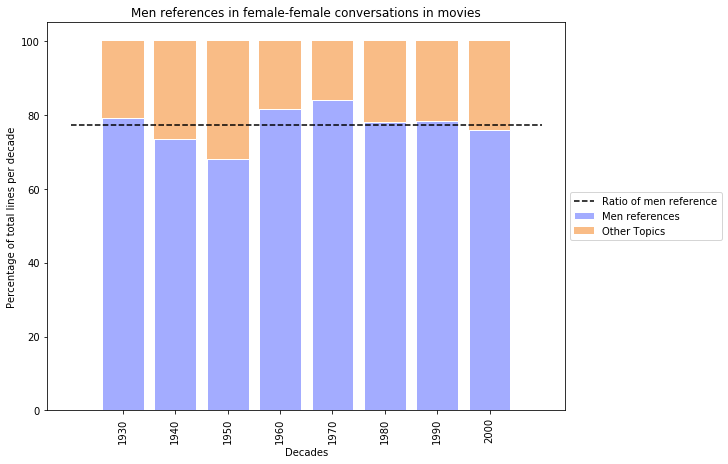

In [0]:
ax = plt.subplots(figsize=(10,7))
plt.subplots_adjust(left=0.06, right=0.78, bottom=0.18, top=0.95)
plt.bar(range(len(f_f_topics_words_men_ratio)), f_f_topics_words_men_ratio['line_id'], label='Men references', color = '#a3acff', edgecolor='white')
plt.bar(range(len(f_f_topics_words_not_men_ratio)), f_f_topics_words_not_men_ratio['line_id'], label='Other Topics',bottom=f_f_topics_words_men_ratio['line_id'], color="#f9bc86")
plt.xticks(range(len(f_f_topics_words_not_men_ratio)), m_m_plot_std.keys(), rotation=90)
plt.hlines(total, -1, len(f_f_topics_words_not_men_ratio),colors='k', linestyles='--', label='Ratio of men reference')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Decades")
plt.ylabel("Percentage of total lines per decade")
plt.title("Men references in female-female conversations in movies")
plt.show()

## LIWC averages and topics

In [0]:
f_f_topic = f_f_movie_lines[['movie_id','line_id','male','work','home','leisure','money','health','friend']]
f_f_topic = f_f_movie_lines.merge(movie_metadata, on=['movie_id'])

In [0]:
# Modify Plots (add all datasets in one plot with different colors)
f_f_topic_std = f_f_topic.groupby((f_f_topic['release_year'].apply(int)//10)*10,as_index=True).std()
f_f_topic_mean = f_f_topic.groupby((f_f_topic['release_year'].apply(int)//10)*10,as_index=True).mean()
f_f_topic_count = f_f_topic.groupby((f_f_topic['release_year'].apply(int)//10)*10,as_index=True).count()


In [0]:
f_f_topic_std

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,release_year,avg_rating,num_votes
release_year,,,,,,,,,,,,,,,,,,,,,
1930,11.511146,36.033016,36.725604,42.397714,33.897044,4.099553,15.762330,14.475704,22.236517,15.659774,...,13.165601,13.399326,12.333207,0.626561,10.232422,0.000000,1.462618,2.632269,0.411273,24509.533788
1940,11.377006,37.100809,36.195086,42.073589,34.240354,4.093301,14.208136,17.337858,21.577282,16.030226,...,13.538440,14.958800,13.640699,1.743383,10.243001,0.548689,0.665011,2.102350,0.761462,63123.794092
1950,17.678196,36.366592,38.363330,41.625229,35.125704,4.673712,14.501994,18.315420,21.785405,16.521539,...,14.950225,5.442915,7.723156,1.211552,10.409015,0.000000,3.296887,1.860532,0.297685,10872.203836
1960,13.058260,38.353541,36.546367,42.844440,33.121853,3.995565,15.212082,17.751970,25.586568,16.605204,...,20.506262,8.202271,2.557127,0.000000,9.368227,0.000000,7.856666,1.862296,0.029071,18288.154110
1970,7.879506,36.771542,36.935163,41.604568,35.407454,4.281882,16.161995,19.388250,26.786852,19.730816,...,21.468536,11.043374,12.891717,0.000000,11.061000,0.000000,8.273195,2.268313,0.770351,41127.454216
1980,9.662553,36.942228,38.155174,42.910551,31.517052,3.750850,15.399805,15.621073,24.519350,18.406650,...,19.405284,11.959137,8.269792,0.922999,11.079970,0.000000,2.848239,1.878253,1.238140,27510.528211
1990,11.025965,36.879196,36.949122,42.137229,33.580202,4.051923,15.300648,16.985041,23.830066,18.127430,...,20.104585,14.290253,8.421737,1.647798,11.500885,0.368525,8.078263,2.893006,0.899292,23285.081699
2000,10.173465,36.776834,37.841124,42.587982,33.147620,4.090641,14.944611,17.141909,23.816439,18.267295,...,18.735798,12.063431,11.703143,2.991028,11.131986,0.000000,2.002065,2.426254,1.042840,45273.906824


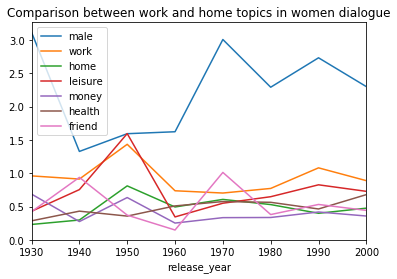

In [0]:
f_f_topic_mean[['male','work','home','leisure','money','health','friend']].plot(title='Comparison between work and home topics in women dialogue')

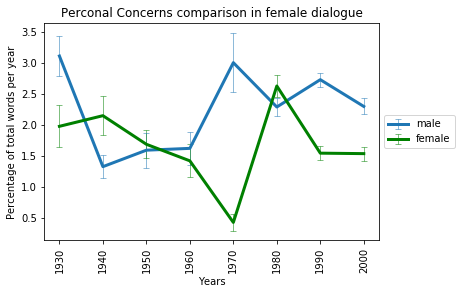

In [0]:
err = np.divide(f_f_topic_std['male'], np.sqrt(f_f_topic_count['male']))
plt.errorbar(range(len(f_f_topic_std)), f_f_topic_mean['male'], yerr=err, zorder=2, fmt="",
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    capsize=3,     # cap length for error bar
    capthick=0.5   # cap thickness for error bar 
    )

err = np.divide(f_f_topic_std['female'], np.sqrt(f_f_topic_count['female']))
plt.errorbar(range(len(f_f_topic_std)), f_f_topic_mean['female'], yerr=err, zorder=2, fmt="",
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    capsize=3,     # cap length for error bar
    capthick=0.5,   # cap thickness for error bar 
    color='g'
    )
plt.xticks(range(len(f_f_topic_std)), f_f_topic_std['female'].keys(), rotation=90)


plt.xticks(range(len(f_f_topic_std)), f_f_topic_std['work'].keys(), rotation=90)
plt.title("Male references vs Female references in female dialogue")
plt.xlabel("Years")
plt.ylabel("Percentage of total words per year")
plt.title("Male references vs Female references in female dialogue")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


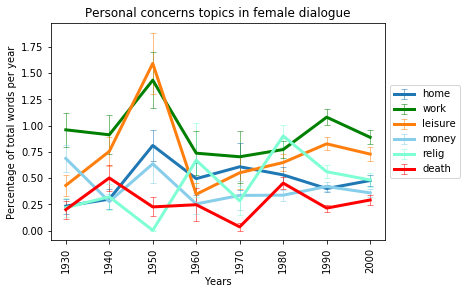

In [0]:
err = np.divide(f_f_topic_std['home'], np.sqrt(f_f_topic_count['home']))
plt.errorbar(range(len(f_f_topic_std)), f_f_topic_mean['home'], yerr=err, zorder=2, fmt="",
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    capsize=3,     # cap length for error bar
    capthick=0.5   # cap thickness for error bar 
    )

err = np.divide(f_f_topic_std['work'], np.sqrt(f_f_topic_count['work']))
plt.errorbar(range(len(f_f_topic_std)), f_f_topic_mean['work'], yerr=err, zorder=2, fmt="",
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    capsize=3,     # cap length for error bar
    capthick=0.5,   # cap thickness for error bar 
    color='g'
    )

err = np.divide(f_f_topic_std['leisure'], np.sqrt(f_f_topic_count['leisure']))
plt.errorbar(range(len(f_f_topic_std)), f_f_topic_mean['leisure'], yerr=err, zorder=2, fmt="",
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    capsize=3,     # cap length for error bar
    capthick=0.5   # cap thickness for error bar 
    )

err = np.divide(f_f_topic_std['money'], np.sqrt(f_f_topic_count['money']))
plt.errorbar(range(len(f_f_topic_std)), f_f_topic_mean['money'], yerr=err, zorder=2, fmt="",
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    capsize=3,     # cap length for error bar
    capthick=0.5,   # cap thickness for error bar 
    color='#87CEEB'
    )


err = np.divide(f_f_topic_std['relig'], np.sqrt(f_f_topic_count['relig']))
plt.errorbar(range(len(f_f_topic_std)), f_f_topic_mean['relig'], yerr=err, zorder=2, fmt="",
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    capsize=3,     # cap length for error bar
    capthick=0.5,   # cap thickness for error bar 
    color='#7FFFD4'
    )

err = np.divide(f_f_topic_std['death'], np.sqrt(f_f_topic_count['death']))
plt.errorbar(range(len(f_f_topic_std)), f_f_topic_mean['death'], yerr=err, zorder=2, fmt="",
    linewidth=3,   # width of plot line
    elinewidth=0.5,# width of error bar line
    capsize=3,     # cap length for error bar
    capthick=0.5,   # cap thickness for error bar 
    color='r'
    )

plt.xticks(range(len(f_f_topic_std)), f_f_topic_std['female'].keys(), rotation=90)


plt.xticks(range(len(f_f_topic_std)), f_f_topic_std['work'].keys(), rotation=90)
plt.title("Personal concerns topics in female dialogue")
plt.xlabel("Years")
plt.ylabel("Percentage of total words per year")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
